# ATV 07 - Análise de Sentimento - Classificação de comentários no IMDB com Redes Neurais Recorrentes

In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import datetime

import nltk
nltk.data.path.append('/Users/luiscruz/nltk_data')  
nltk.download("punkt")  # pretrained tokenization model
nltk.download('punkt_tab')
print(nltk.data.find('tokenizers/punkt'))

from nltk.tokenize import word_tokenize

nltk.download('stopwords')
from nltk.corpus import stopwords

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, SimpleRNN, Input

RANDOM_STATE = 42


[nltk_data] Downloading package punkt to /home/luisc/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/luisc/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /home/luisc/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/luisc/nltk_data...


/home/luisc/nltk_data/tokenizers/punkt


[nltk_data]   Package wordnet is already up-to-date!
2024-10-30 15:02:38.388952: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-30 15:02:39.298753: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-30 15:02:46.738114: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-30 15:02:52.656779: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1730311376.625114   37946 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one 

In [2]:
imdb = pd.read_csv("./IMDB.csv")

## Repetindo os experimentos da ATV 06

### Pre-processamento

- Tokenização
- Remoção de Stop Words
- Stemming ou Lemmatization

In [3]:
def remove_html_tags_and_punctuation(text):
    clean = re.sub(r'<.*?>', '', text)
    clean = re.sub(r'\.', ' ', clean)
    clean = re.sub(r'[^\w\s]', '', clean)
    clean = re.sub(r'\d', '', clean) 
    return clean

comments = imdb["review"].to_numpy()
targets = imdb["sentiment"].to_numpy()

for i in range(len(comments)):
    comments[i] = remove_html_tags_and_punctuation(comments[i])

print(comments[0])

One of the other reviewers has mentioned that after watching just  Oz episode youll be hooked  They are right as this is exactly what happened with me The first thing that struck me about Oz was its brutality and unflinching scenes of violence which set in right from the word GO  Trust me this is not a show for the faint hearted or timid  This show pulls no punches with regards to drugs sex or violence  Its is hardcore in the classic use of the word It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary  It focuses mainly on Emerald City an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda  Em City is home to many  Aryans Muslims gangstas Latinos Christians Italians Irish and more    so scuffles death stares dodgy dealings and shady agreements are never far away I would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare  Forget

In [ ]:
for sentence in comments[0:5]:
    print(sentence)

One of the other reviewers has mentioned that after watching just  Oz episode youll be hooked  They are right as this is exactly what happened with me The first thing that struck me about Oz was its brutality and unflinching scenes of violence which set in right from the word GO  Trust me this is not a show for the faint hearted or timid  This show pulls no punches with regards to drugs sex or violence  Its is hardcore in the classic use of the word It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary  It focuses mainly on Emerald City an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda  Em City is home to many  Aryans Muslims gangstas Latinos Christians Italians Irish and more    so scuffles death stares dodgy dealings and shady agreements are never far away I would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare  Forget

In [5]:
tokenized_corpus = [word_tokenize(sentence.lower()) for sentence in comments]
tokenized_corpus[0]

['one',
 'of',
 'the',
 'other',
 'reviewers',
 'has',
 'mentioned',
 'that',
 'after',
 'watching',
 'just',
 'oz',
 'episode',
 'youll',
 'be',
 'hooked',
 'they',
 'are',
 'right',
 'as',
 'this',
 'is',
 'exactly',
 'what',
 'happened',
 'with',
 'me',
 'the',
 'first',
 'thing',
 'that',
 'struck',
 'me',
 'about',
 'oz',
 'was',
 'its',
 'brutality',
 'and',
 'unflinching',
 'scenes',
 'of',
 'violence',
 'which',
 'set',
 'in',
 'right',
 'from',
 'the',
 'word',
 'go',
 'trust',
 'me',
 'this',
 'is',
 'not',
 'a',
 'show',
 'for',
 'the',
 'faint',
 'hearted',
 'or',
 'timid',
 'this',
 'show',
 'pulls',
 'no',
 'punches',
 'with',
 'regards',
 'to',
 'drugs',
 'sex',
 'or',
 'violence',
 'its',
 'is',
 'hardcore',
 'in',
 'the',
 'classic',
 'use',
 'of',
 'the',
 'word',
 'it',
 'is',
 'called',
 'oz',
 'as',
 'that',
 'is',
 'the',
 'nickname',
 'given',
 'to',
 'the',
 'oswald',
 'maximum',
 'security',
 'state',
 'penitentary',
 'it',
 'focuses',
 'mainly',
 'on',
 'emera

In [6]:
# Get the list of stopwords in English
stop_words = set(stopwords.words('english'))

tokenized_filtered_corpus = []

for comment in tokenized_corpus:
    filtered_words = [word for word in comment if word.lower() not in stop_words]
    tokenized_filtered_corpus.append(filtered_words)

print(tokenized_filtered_corpus[0])

['one', 'reviewers', 'mentioned', 'watching', 'oz', 'episode', 'youll', 'hooked', 'right', 'exactly', 'happened', 'first', 'thing', 'struck', 'oz', 'brutality', 'unflinching', 'scenes', 'violence', 'set', 'right', 'word', 'go', 'trust', 'show', 'faint', 'hearted', 'timid', 'show', 'pulls', 'punches', 'regards', 'drugs', 'sex', 'violence', 'hardcore', 'classic', 'use', 'word', 'called', 'oz', 'nickname', 'given', 'oswald', 'maximum', 'security', 'state', 'penitentary', 'focuses', 'mainly', 'emerald', 'city', 'experimental', 'section', 'prison', 'cells', 'glass', 'fronts', 'face', 'inwards', 'privacy', 'high', 'agenda', 'em', 'city', 'home', 'many', 'aryans', 'muslims', 'gangstas', 'latinos', 'christians', 'italians', 'irish', 'scuffles', 'death', 'stares', 'dodgy', 'dealings', 'shady', 'agreements', 'never', 'far', 'away', 'would', 'say', 'main', 'appeal', 'show', 'due', 'fact', 'goes', 'shows', 'wouldnt', 'dare', 'forget', 'pretty', 'pictures', 'painted', 'mainstream', 'audiences', 'fo

In [7]:
lemmatizer = WordNetLemmatizer()

tokenized_filtered_lemmatized = []

for comment in tokenized_filtered_corpus:
    lemmatized_words = [lemmatizer.lemmatize(word) for word in comment]
    tokenized_filtered_lemmatized.append(lemmatized_words)

print(tokenized_filtered_lemmatized[0])

['one', 'reviewer', 'mentioned', 'watching', 'oz', 'episode', 'youll', 'hooked', 'right', 'exactly', 'happened', 'first', 'thing', 'struck', 'oz', 'brutality', 'unflinching', 'scene', 'violence', 'set', 'right', 'word', 'go', 'trust', 'show', 'faint', 'hearted', 'timid', 'show', 'pull', 'punch', 'regard', 'drug', 'sex', 'violence', 'hardcore', 'classic', 'use', 'word', 'called', 'oz', 'nickname', 'given', 'oswald', 'maximum', 'security', 'state', 'penitentary', 'focus', 'mainly', 'emerald', 'city', 'experimental', 'section', 'prison', 'cell', 'glass', 'front', 'face', 'inwards', 'privacy', 'high', 'agenda', 'em', 'city', 'home', 'many', 'aryan', 'muslim', 'gangsta', 'latino', 'christian', 'italian', 'irish', 'scuffle', 'death', 'stare', 'dodgy', 'dealing', 'shady', 'agreement', 'never', 'far', 'away', 'would', 'say', 'main', 'appeal', 'show', 'due', 'fact', 'go', 'show', 'wouldnt', 'dare', 'forget', 'pretty', 'picture', 'painted', 'mainstream', 'audience', 'forget', 'charm', 'forget', 

### Vetorização

- BoW
- TF-IDF
- Word2Vec

In [8]:
[" ".join(sentence) for sentence in tokenized_filtered_lemmatized]

['one reviewer mentioned watching oz episode youll hooked right exactly happened first thing struck oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home many aryan muslim gangsta latino christian italian irish scuffle death stare dodgy dealing shady agreement never far away would say main appeal show due fact go show wouldnt dare forget pretty picture painted mainstream audience forget charm forget romance oz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high level graphic violence violence injustice crooked guard wholl sold nickel inmate wholl kill order get away well mannered middle class inmate turned prison bitch due lack st

In [9]:
MAX_FEATURES = 2500
MIN_DF = 0.05
MAX_DF = 0.2

In [10]:
def bow_vectorization(corpus):
    vectorizer = CountVectorizer(max_features=MAX_FEATURES, min_df=MIN_DF, max_df=MAX_DF)

    X = vectorizer.fit_transform([" ".join(sentence) for sentence in corpus])

    bow_array = X.toarray()
    print("BoW Vectors:\n", bow_array)

    print("Feature Names:\n", vectorizer.get_feature_names_out())

    return np.array(bow_array)

In [11]:
def tf_idf_vectorization(corpus):
    tfidf_vectorizer = TfidfVectorizer(max_features=MAX_FEATURES, min_df=MIN_DF, max_df=MAX_DF)

    X_tfidf = tfidf_vectorizer.fit_transform([" ".join(sentence) for sentence in corpus])

    tfidf_array = X_tfidf.toarray()
    print("TF-IDF Vectors:\n", tfidf_array)

    print("Feature Names:\n", tfidf_vectorizer.get_feature_names_out())

    return np.array(tfidf_array)

In [12]:
def word2vec_vectorization(corpus):
    model = Word2Vec(sentences=corpus, vector_size=100, window=5, min_count=1, workers=4)

    # Access the vector for a specific word
    word_vector = model.wv['document']
    print("Word Vector for 'document':\n", word_vector)

    # To get vectors for the entire corpus, you can average the vectors of all words in each document
    doc_vectors = []
    for doc in tokenized_corpus:
        # Average the word vectors for each document
        vector = np.mean([model.wv[word] for word in doc if word in model.wv], axis=0)
        doc_vectors.append(vector)

    print("Document Vectors (Averaged):\n", np.array(doc_vectors))

    return np.array(doc_vectors)

In [13]:
bow_res = bow_vectorization(tokenized_filtered_lemmatized)

BoW Vectors:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Feature Names:
 ['absolutely' 'act' 'action' 'actor' 'actually' 'almost' 'along'
 'although' 'always' 'american' 'another' 'anyone' 'anything' 'around'
 'attempt' 'audience' 'away' 'awful' 'back' 'beautiful' 'become'
 'beginning' 'believe' 'best' 'better' 'big' 'bit' 'black' 'book' 'boring'
 'boy' 'budget' 'came' 'camera' 'cant' 'care' 'case' 'cast' 'certainly'
 'child' 'classic' 'come' 'comedy' 'completely' 'couldnt' 'couple'
 'course' 'day' 'dead' 'death' 'definitely' 'dialogue' 'didnt' 'different'
 'direction' 'director' 'doesnt' 'done' 'dvd' 'early' 'effect' 'either'
 'else' 'end' 'ending' 'enjoy' 'enough' 'entertaining' 'entire' 'episode'
 'especially' 'ever' 'every' 'everyone' 'everything' 'example' 'excellent'
 'eye' 'face' 'fact' 'fall' 'family' 'fan' 'far' 'father' 'feel' 'feeling'
 'finally' 'find' 'flick' 'found' 'friend' 'full' 'fun' 'funny' 

In [14]:
tf_idf_res = tf_idf_vectorization(tokenized_filtered_lemmatized)

TF-IDF Vectors:
 [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.17757885 0.        ]
 ...
 [0.         0.2089076  0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
Feature Names:
 ['absolutely' 'act' 'action' 'actor' 'actually' 'almost' 'along'
 'although' 'always' 'american' 'another' 'anyone' 'anything' 'around'
 'attempt' 'audience' 'away' 'awful' 'back' 'beautiful' 'become'
 'beginning' 'believe' 'best' 'better' 'big' 'bit' 'black' 'book' 'boring'
 'boy' 'budget' 'came' 'camera' 'cant' 'care' 'case' 'cast' 'certainly'
 'child' 'classic' 'come' 'comedy' 'completely' 'couldnt' 'couple'
 'course' 'day' 'dead' 'death' 'definitely' 'dialogue' 'didnt' 'different'
 'direction' 'director' 'doesnt' 

In [15]:
w2v_res = word2vec_vectorization(tokenized_filtered_lemmatized)

Word Vector for 'document':
 [ 0.25468233  0.3166106  -0.28500736  0.5379717  -0.29369122 -0.7343231
  0.35689127  0.11171243 -0.7756148   0.49529457 -0.65836626 -0.6084604
 -0.08107926 -0.45670608 -0.1600328  -0.359801   -0.42118514 -0.08600113
 -0.577565   -0.5138663  -0.17970636  0.32309502  0.11633853 -0.5928206
 -0.41531506  0.19081683 -0.13021106 -0.02040628 -0.6918808   0.11731688
  0.6669756   0.8211616  -0.10145604 -0.03323748 -0.18528727  0.6482471
 -0.48801655 -0.6418616  -0.9033872  -0.09681189  0.57333416 -0.71893966
  0.57853025  0.12134165  0.0749988  -0.2290474   0.00285697 -0.449669
 -0.13772748  0.0559581   0.21021686 -0.4030613  -0.02823286 -0.8293327
  0.20916837 -0.44852823  0.10536627  0.55566996 -0.07790785  0.3900796
  0.43163437  0.21152471 -0.18134014 -0.21448351  0.07770454  0.53550607
 -0.20995308 -0.16785406 -0.3915391   0.38628393 -0.5621635   0.16882184
  0.05381614 -0.16104376  0.55780625  0.15103196  0.45247552 -0.51017594
  0.48689863  0.48205993 -0.21

### Experimentos

In [16]:
bow_res.shape, tf_idf_res.shape, w2v_res.shape

((50000, 285), (50000, 285), (50000, 100))

In [17]:
def define_lstm(input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(LSTM(128))
    model.add(Dense(1, activation="sigmoid"))

    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

    return model

def define_rnn(input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(SimpleRNN(128))
    model.add(Dense(1, activation="sigmoid"))

    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

    return model

define_lstm((bow_res.shape[1], 1)).summary()
define_rnn((bow_res.shape[1], 1)).summary()

2024-10-29 16:47:28.155982: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 128)            │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,689 (260.50 KB)

 Trainable params: 66,689 (260.50 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 128)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,769 (65.50 KB)

 Trainable params: 16,769 (65.50 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
def train_test_classifier(data, targets, classifier, title="Model"):
    X_test = data[40000:]
    y_test = targets[40000:]
    X_train, X_val, y_train, y_val = train_test_split(data[:40000], targets[:40000], test_size=0.25, random_state=RANDOM_STATE)

    classifier.fit(
        X_train,
        y_train,
        epochs=4,
        batch_size=256,
        validation_data=(X_val, y_val)
    )

    y_hat = np.array(classifier.predict(X_test))
    y_pred = (y_hat > 0.5).astype(int)

    print(title)
    print(classification_report(y_test, y_pred))

    return accuracy_score(y_test, y_pred)

In [26]:
bow_res[0:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 0]])

In [27]:
targets[0:5]

array(['positive', 'positive', 'positive', 'negative', 'positive'],
      dtype=object)

In [28]:
del imdb
del comments
del tokenized_corpus
del tokenized_filtered_corpus
del tokenized_filtered_lemmatized

NameError: name 'imdb' is not defined

In [29]:
targets_num = np.where(targets == 'negative', 0, np.where(targets == 'positive', 1, targets)).astype(np.int32)

targets_num[0:5]

array([1, 1, 1, 0, 1], dtype=int32)

In [30]:
pd.Series(targets_num).info()

<class 'pandas.core.series.Series'>
RangeIndex: 50000 entries, 0 to 49999
Series name: None
Non-Null Count  Dtype
--------------  -----
50000 non-null  int32
dtypes: int32(1)
memory usage: 195.4 KB


TODO: coletar tempo de treinamento

In [31]:
rnn_accs = []
lstm_accs = []
rnn_training_time_deltas = []
lstm_training_time_deltas = []

for i, data in enumerate([bow_res, tf_idf_res, w2v_res]):
    rnn = define_rnn((data.shape[1], 1))
    lstm = define_lstm((data.shape[1], 1))

    rnn_accs.append(train_test_classifier(data, targets_num, rnn, f"RNN {i}"))
    lstm_accs.append(train_test_classifier(data, targets_num, lstm, f"LSTM {i}"))

Epoch 1/4
118/118 ━━━━━━━━━━━━━━━━━━━━ 22s 165ms/step - accuracy: 0.6193 - loss: 0.6402 - val_accuracy: 0.6557 - val_loss: 0.6053
Epoch 2/4
118/118 ━━━━━━━━━━━━━━━━━━━━ 17s 147ms/step - accuracy: 0.6524 - loss: 0.6074 - val_accuracy: 0.6611 - val_loss: 0.5946
Epoch 3/4
118/118 ━━━━━━━━━━━━━━━━━━━━ 17s 147ms/step - accuracy: 0.6524 - loss: 0.6042 - val_accuracy: 0.6499 - val_loss: 0.6113
Epoch 4/4
118/118 ━━━━━━━━━━━━━━━━━━━━ 19s 163ms/step - accuracy: 0.6428 - loss: 0.6121 - val_accuracy: 0.6560 - val_loss: 0.6028
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step
RNN 0
              precision    recall  f1-score   support

           0       0.68      0.57      0.62      4993
           1       0.63      0.74      0.68      5007

    accuracy                           0.65     10000
   macro avg       0.66      0.65      0.65     10000
weighted avg       0.66      0.65      0.65     10000

Epoch 1/4
118/118 ━━━━━━━━━━━━━━━━━━━━ 86s 714ms/step - accuracy: 0.5392 - loss: 0.6874 - val_accuracy: 0

In [32]:
labels = ["BoW", "TF-IDF", "Word2Vec"]

Text(0.5, 1.0, 'RNN Accuracies for Each Vectorization')

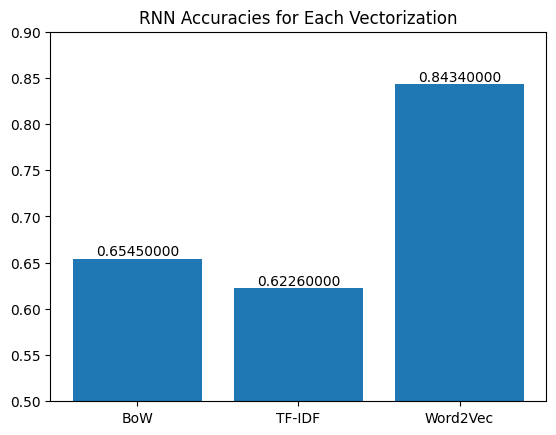

In [35]:
plt.plot()
bars = plt.bar(labels, rnn_accs)
plt.ylim(0.5, 0.9)
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval,
        f'{yval:.8f}',
        ha='center',
        va='bottom'
    )
plt.title("RNN Accuracies for Each Vectorization")

Text(0.5, 1.0, 'LSTM Accuracies for Each Vectorization')

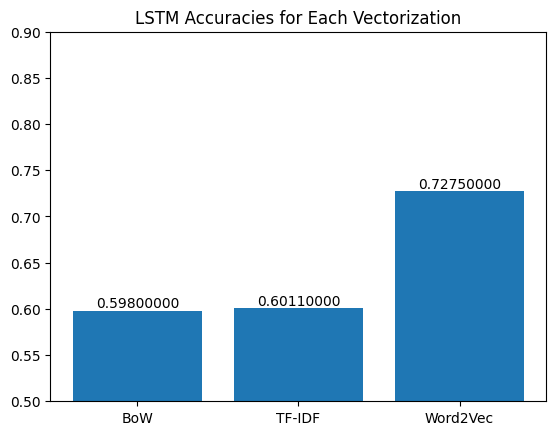

In [36]:
plt.plot()
bars = plt.bar(labels, lstm_accs)
plt.ylim(0.5, 0.9)
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval,
        f'{yval:.8f}',
        ha='center',
        va='bottom'
    )
plt.title("LSTM Accuracies for Each Vectorization")

Igual à atividade anterior, a abordagem Word2Vec traz acurácias melhores em ambos os casos. Aqui, para essa base de dados e as configurações default das duas redes, a RNN simples performa melhor que a LSTM em termos de acurácia. O XGBoost default performa melhor que os dois modelos presentes na Word2Vec

## Requisitos exclusivos atv 07

In [2]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Dropout

In [3]:
max_features = 10000
max_len = 100

### LSTM

In [4]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = max_features, seed=RANDOM_STATE)

In [5]:
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [6]:
lstm = Sequential()
lstm.add(Embedding(max_features, 128, input_length=max_len))
lstm.add(LSTM(128, return_sequences=False))
lstm.add(Dropout(0.5))
lstm.add(Dense(1, activation="sigmoid"))

lstm.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
lstm.summary()

/mnt/c/Users/luisc/Desktop/adv-ml-topics/venv/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
2024-10-30 15:04:28.769795: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [7]:
start = datetime.datetime.now()
history = lstm.fit(
    X_train, y_train,
    epochs=5,
    batch_size=256,
    validation_split=0.2
)
end = datetime.datetime.now()

lstm_delta = end - start

# _, lstm_acc = lstm.evaluate(X_test, y_test)
y_hat_lstm = lstm.predict(X_test)
y_pred_lstm = (y_hat_lstm > 0.5).astype(int)

lstm_acc = accuracy_score(y_pred_lstm, y_test)
lstm_acc, lstm_delta

Epoch 1/5


79/79 ━━━━━━━━━━━━━━━━━━━━ 64s 707ms/step - accuracy: 0.6362 - loss: 0.6091 - val_accuracy: 0.8266 - val_loss: 0.4024
Epoch 2/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 56s 703ms/step - accuracy: 0.8845 - loss: 0.2895 - val_accuracy: 0.8390 - val_loss: 0.3603
Epoch 3/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 56s 709ms/step - accuracy: 0.9217 - loss: 0.2113 - val_accuracy: 0.8372 - val_loss: 0.4035
Epoch 4/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 56s 707ms/step - accuracy: 0.9367 - loss: 0.1742 - val_accuracy: 0.8382 - val_loss: 0.4142
Epoch 5/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 42s 528ms/step - accuracy: 0.9625 - loss: 0.1148 - val_accuracy: 0.8302 - val_loss: 0.4713
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step


(0.8384, datetime.timedelta(seconds=273, microseconds=653544))

### RNN

In [8]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = max_features, seed=RANDOM_STATE)

In [9]:
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [10]:
rnn = Sequential()
rnn.add(Embedding(max_features, 128, input_length=max_len))
rnn.add(SimpleRNN(128, return_sequences=False))
rnn.add(Dropout(0.5))
rnn.add(Dense(1, activation="sigmoid"))

rnn.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
rnn.summary()

/mnt/c/Users/luisc/Desktop/adv-ml-topics/venv/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:
start = datetime.datetime.now()
history = rnn.fit(
    X_train, y_train,
    epochs=5,
    batch_size=256,
    validation_split=0.2
)
end = datetime.datetime.now()
rnn_delta = end - start

# _, rnn_acc = rnn.evaluate(X_test, y_test)
y_hat_rnn = rnn.predict(X_test)
y_pred_rnn = (y_hat_rnn > 0.5).astype(int)

rnn_acc = accuracy_score(y_pred_rnn, y_test)
rnn_acc, rnn_delta

Epoch 1/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - accuracy: 0.5439 - loss: 0.6825 - val_accuracy: 0.7916 - val_loss: 0.4518
Epoch 2/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - accuracy: 0.8371 - loss: 0.3756 - val_accuracy: 0.8316 - val_loss: 0.3889
Epoch 3/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - accuracy: 0.9177 - loss: 0.2200 - val_accuracy: 0.8340 - val_loss: 0.4325
Epoch 4/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - accuracy: 0.9582 - loss: 0.1209 - val_accuracy: 0.8108 - val_loss: 0.4875
Epoch 5/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - accuracy: 0.9818 - loss: 0.0612 - val_accuracy: 0.8194 - val_loss: 0.5701
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step


(0.8192, datetime.timedelta(seconds=29, microseconds=913384))

Usando a camada embedding da API do Keras é possível obter uma performance da LSTM superior a da RNN simples em troca de quase 4x mais tempo de treinamento para o mesmo número de épocas e mesmo tamanho de batch.

Text(0.5, 1.0, 'Accuracies for each model')

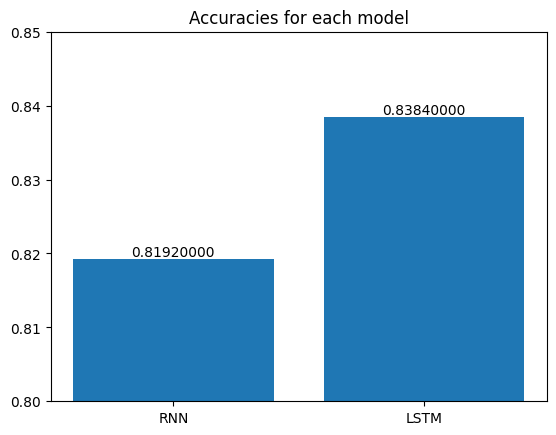

In [12]:
plt.plot()
bars = plt.bar(["RNN", "LSTM"], [rnn_acc, lstm_acc])
plt.ylim(0.8, 0.85)
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval,
        f'{yval:.8f}',
        ha='center',
        va='bottom'
    )
plt.title("Accuracies for each model")

Text(0.5, 1.0, 'Fit time  for each model (seconds)')

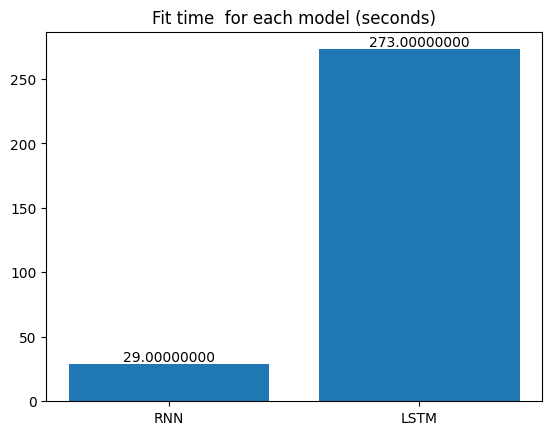

In [13]:
plt.plot()
bars = plt.bar(["RNN", "LSTM"], [rnn_delta.seconds, lstm_delta.seconds])
# plt.ylim(0.8, 0.9)
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval,
        f'{yval:.8f}',
        ha='center',
        va='bottom'
    )
plt.title("Fit time  for each model (seconds)")

In [14]:
def sentence_decoder(sentence):
    word_index = imdb.get_word_index()
    reverse_word_index = {value: key for (key, value) in word_index.items()}

    decoded_sentence = ' '.join([reverse_word_index.get(i - 3, '?') for i in sentence])
    print(decoded_sentence)
    print("\n\n")

In [15]:
counter = 0

for j in range(len(y_pred_lstm)):
    if counter >= 3:
        break
    if y_pred_lstm[j] != y_pred_rnn[j]:
        sentence_decoder(X_test[j])
        counter += 1

series it doesn't even have andy the central character for all the previous ones ? seems to ? with characters from another movie a soap opera about two teens running off together to get married there is one cool elaborate death scene involving broken glass and water ? everywhere the movie is very gory very funny and has pop culture references from martha ? to jerry springer do not see this one before you see the other three it will really ruin the effect since the first one is truly scary lots of guilty pleasure fun and silliness br br



this one is different too it is way too slow for his standards in parts it drags one almost to sleep br br noticeable it is tough to notice anything other than in the first half of the movie i think this skin show was necessary for the dance sequences involved also looks like is a pro in ? she is way too ? almost like a ? ? baby is ? as an actor with every movie i am sure his blood is paying off rich ? the title song was really good the music overall 

Os 3 reviews categorizados diferentes parecem realmente dúbios, eles misturam palavras diferentes que podem causar incerteza na classificação.

### Tunando a LSTM

In [16]:
num_words = [10000, 12500, 15000]
num_units = [64, 128, 256, 512]

In [17]:
results = []
count = 1

for word_count in num_words:
    for unit_count in num_units:
        print(f"iteration {count}; word_count: {word_count}; unit_count: {unit_count}")
        count += 1
        print(f"----------------------------------------------------------------------")
        (X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = word_count, seed=RANDOM_STATE)

        X_train = pad_sequences(X_train, maxlen=max_len)
        X_test = pad_sequences(X_test, maxlen=max_len)

        lstm = Sequential()
        lstm.add(Embedding(word_count, unit_count))
        lstm.add(LSTM(unit_count, return_sequences=False))
        lstm.add(Dropout(0.5))
        lstm.add(Dense(1, activation="sigmoid"))

        lstm.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
        lstm.fit(
            X_train, y_train,
            epochs=3,
            batch_size=512,
            validation_split=0.2
        )

        # _, rnn_acc = rnn.evaluate(X_test, y_test)
        y_hat_lstm = lstm.predict(X_test)
        y_pred_lstm = (y_hat_lstm > 0.5).astype(int)

        lstm_acc = accuracy_score(y_pred_lstm, y_test)

        results.append({
            "word_count": word_count,
            "unit_count": unit_count,
            "accuracy": lstm_acc
        })

iteration 1; word_count: 10000; unit_count: 64
----------------------------------------------------------------------
Epoch 1/3
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 195ms/step - accuracy: 0.5763 - loss: 0.6723 - val_accuracy: 0.8052 - val_loss: 0.4439
Epoch 2/3
40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 207ms/step - accuracy: 0.8327 - loss: 0.3971 - val_accuracy: 0.8384 - val_loss: 0.3689
Epoch 3/3
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 214ms/step - accuracy: 0.9007 - loss: 0.2760 - val_accuracy: 0.8476 - val_loss: 0.3449
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step
iteration 2; word_count: 10000; unit_count: 128
----------------------------------------------------------------------
Epoch 1/3
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 469ms/step - accuracy: 0.6096 - loss: 0.6603 - val_accuracy: 0.8316 - val_loss: 0.3974
Epoch 2/3
40/40 ━━━━━━━━━━━━━━━━━━━━ 19s 484ms/step - accuracy: 0.8444 - loss: 0.3599 - val_accuracy: 0.8442 - val_loss: 0.3731
Epoch 3/3
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 506ms/step - accuracy: 0.9077 - loss: 0.24

In [18]:
results

[{'word_count': 10000, 'unit_count': 64, 'accuracy': 0.84644},
 {'word_count': 10000, 'unit_count': 128, 'accuracy': 0.84708},
 {'word_count': 10000, 'unit_count': 256, 'accuracy': 0.83288},
 {'word_count': 10000, 'unit_count': 512, 'accuracy': 0.84488},
 {'word_count': 12500, 'unit_count': 64, 'accuracy': 0.84072},
 {'word_count': 12500, 'unit_count': 128, 'accuracy': 0.83024},
 {'word_count': 12500, 'unit_count': 256, 'accuracy': 0.8366},
 {'word_count': 12500, 'unit_count': 512, 'accuracy': 0.83792},
 {'word_count': 15000, 'unit_count': 64, 'accuracy': 0.83692},
 {'word_count': 15000, 'unit_count': 128, 'accuracy': 0.84432},
 {'word_count': 15000, 'unit_count': 256, 'accuracy': 0.84268},
 {'word_count': 15000, 'unit_count': 512, 'accuracy': 0.83296}]

Text(0.5, 1.0, 'Accuracies for each combination')

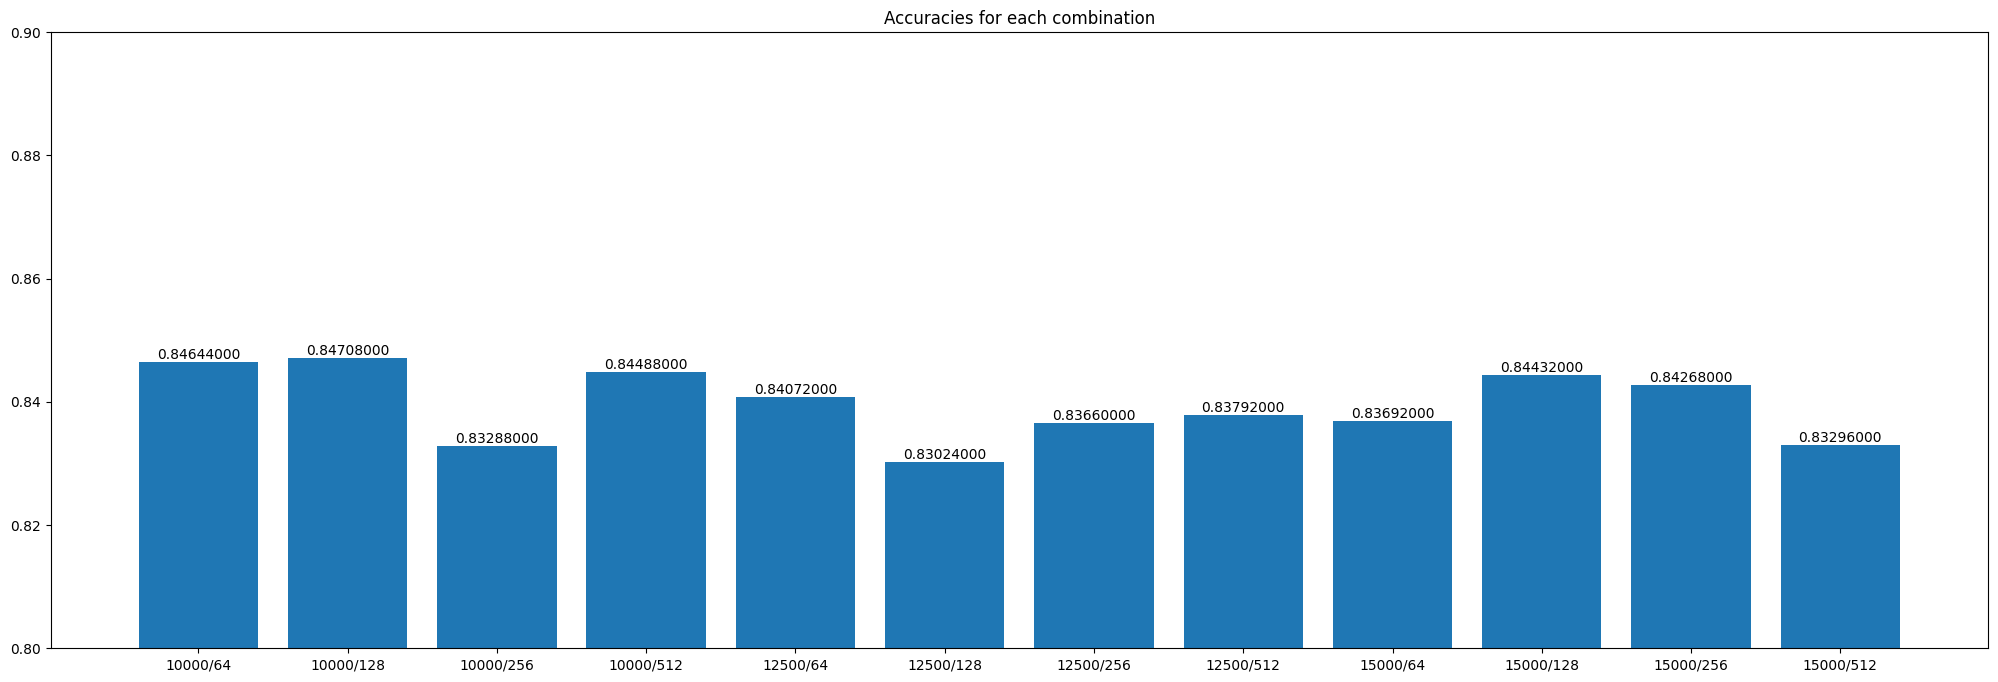

In [26]:
plt.figure(figsize=(25, 8))
plt.plot()
bars = plt.bar(
    [f"{i['word_count']}/{i['unit_count']}" for i in results], 
    [i["accuracy"] for i in results]
)
plt.ylim(0.8, 0.9)
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval,
        f'{yval:.8f}',
        ha='center',
        va='bottom'
    )
plt.title("Accuracies for each combination")

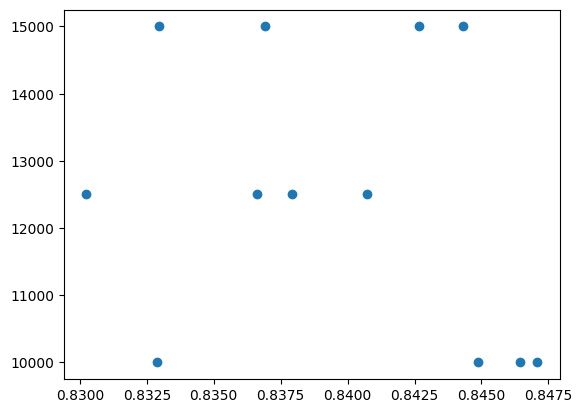

In [27]:
plt.scatter([result["accuracy"] for result in results], [result["word_count"] for result in results])

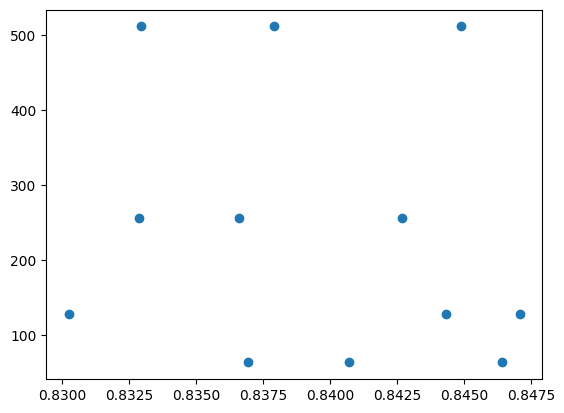

In [28]:
plt.scatter([result["accuracy"] for result in results], [result["unit_count"] for result in results])

Visualmente não parece haver correlação entre aumentar o número de unidades e aumentar o número de features com uma melhora na performance da LSTM, considerando essa base de dados, treinada com apenas 5 épocas. Aqui a melhor acurácia é encontrada com 10_000 features e 128 unidades, apesar de que o ganho de 64 para 128 unidades é ínfimo.